In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Smoothing COVID data

So we'll see how a convolution works on real data.
We'll get the latest mortality figures from **GitHub**.

The [source](https://github.com/CSSEGISandData/COVID-19) is maintained by John Hopkins University.


In [229]:
! ../.g

[master 4e03317] web
 23 files changed, 6542 insertions(+), 759 deletions(-)
 create mode 100644 .stage_m2r_2020.tex.swp
 create mode 100644 PROG/.ipynb_checkpoints/covid_pca-checkpoint.ipynb
 create mode 100644 PROG/covid_confirmed_uk.csv
 create mode 100644 PROG/covid_deaths_uk.csv
 create mode 100644 PROG/covid_pca.ipynb
 create mode 100644 STAGES/4surfaces.png
 create mode 100644 STAGES/chas.png
 create mode 100644 STAGES/stage_m2r_2020.aux
 create mode 100644 STAGES/stage_m2r_2020.log
 create mode 100644 STAGES/stage_m2r_2020.md
 create mode 100644 STAGES/stage_m2r_2020.pdf
 create mode 100644 STAGES/stage_m2r_2020.tex
 create mode 100644 STAGES/stage_m2r_2020_bis.log
 create mode 100644 STAGES/stage_m2r_2020_bis.md
 create mode 100644 STAGES/stage_m2r_2020_bis.tex
 create mode 100644 stage_m2r_2020.pdf
 create mode 100644 stage_m2r_2020.tex
 create mode 100644 stage_m2r_2020_bis.tex
Counting objects: 18, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (1

In [230]:
import requests
import pandas as pd

In [4]:
root_dir = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
fn = 'time_series_covid19_%s_global.csv'

for ss in ['deaths','confirmed']:
    r = requests.get(root_dir + fn%ss, allow_redirects=True)
    open('covid_%s.csv'%ss, 'wb').write(r.content)

---

## List the countries with > 10000 dead

In [232]:
df = pd.read_csv('covid_deaths.csv')

In [233]:
def ref2weeks(ref):
    X = df.iloc[ref][4:].values
    X = X[len(X) % 7  + 6:]
    X = np.diff(X,1).reshape((-1,7))
    return X.sum(axis=0)



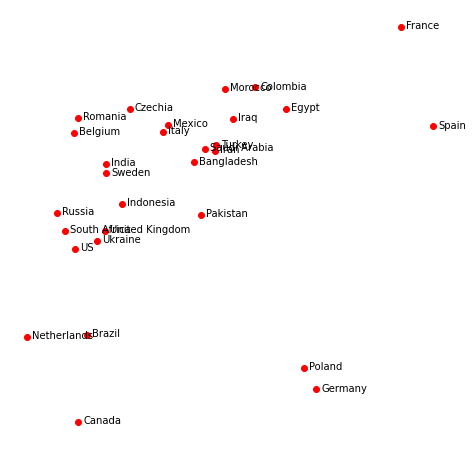

In [226]:
ref4big = df[ df.iloc[:,-1] > 4000 ].index.tolist()

WX = [ ref2weeks(ref) for ref in ref4big]
#normalise
WX = np.array([ x/np.linalg.norm(x) for x in WX]).astype(float)
#calculate covariance
cov = np.dot(WX, WX.T)

vp, vecs = np.linalg.eig(cov)

Xx = [ np.dot(-vecs[0], u).real for u in cov]
Yx = [ np.dot(vecs[1], u).real for u in cov]

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
ax.axis('off')


labels = df.iloc[ref4big,1]
kk = 0
for label , x, y  in zip(labels,Xx, Yx): 
    if label.lower() in ['ecuador', 'china', 'bolivia']: continue
    if label.lower() in ['peru', 'chile', 'argentina', 'philippines']: continue
    
    #print(label)
    ax.plot([x], [y], 'ro');
    ax.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(5,-2), # distance from text to points (x,y) : not same units
                 ha='left') # horizontal alignment can be left, right or center
    
    

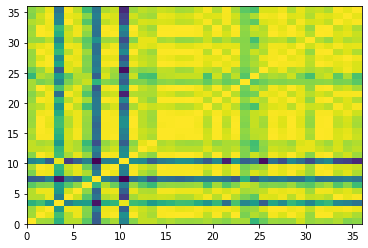

In [235]:
ref4big = df[ df.iloc[:,-1] > 4000 ].index.tolist()

WX = [ ref2weeks(ref) for ref in ref4big]
WX = np.array([ x/np.linalg.norm(x) for x in WX]).astype(float)
cov = np.dot(WX, WX.T)

plt.pcolor(cov);

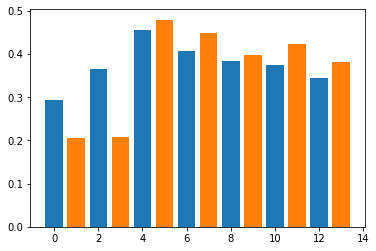

In [228]:
ii = 25

for k,ii in enumerate([9,-1]):
    plt.bar(np.arange(k,14,2), WX[ii]);
#plt.title(df.iloc[ref4big[ii], 1]);

In [206]:
pd.DataFrame( {'ref': np.arange(len(ref4big)), 'country':df.iloc[ref4big,1]} )

,ref,country
6,0,Argentina
20,1,Bangladesh
23,2,Belgium
27,3,Bolivia
30,4,Brazil
50,5,Canada
55,6,Chile
69,7,China
89,8,Colombia
98,9,Czechia
